<center><h1>Diving into Data Modeling and Validation</h1></center>

<center><h1>Unsupervised Learning Algorithms</h1></center>

## Table of contents
* [Unsupervised Learning Process](#us-learning)
* [Clustering Algorithms]()
    * [K-Means Clustering](#kmc)
    * [Gaussian Mixture Models (GMM)](#gmm)
    * [DBSCAN Clustering](#dbscan)
* [Evaluation Metrics for Clustering](#eval-cluster)
* [Dimensionality Reduction Algorithms]()
    * [Principal component analysis (PCA)](#pca)
* [Case Study 3: Clustering](#case3)

<a id='us-learning'></a>
## Unsupervised Learning Process

#### What is Unsupervised learning?
Unsupervised machine learning is the machine learning task of inferring or describing hidden structure from “unlabeled” data without any guidance.

#### How it works?
Let's understand from the following image..
<img src="imgs/us-learning.png" alt="drawing" width="800">

**So:**
* There is no training-testing data
* There is no target variable

#### Types of Unsupervised learning
There are 2 common types of Unsupervised learning:
1. **Clustering**: Clustering is used for analyzing and grouping data which does not include pre-labeled class or class attributes.
2. **Association**: Association discovers the probability of the co-occurrence of items in a collection.

#### Application of Unsupervised learning
* Cluster/Similar Groups Analysis
* Data Exploration and Visualization
* Dimensionality Reduction
* Finding Association Rules
* Anomaly Detection or Outlier Analysis
* Topic Modelling
* Recommendation engines
* Market segmentation
* Social network analysis
* Search result grouping
* Medical imaging
* Image segmentation

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np

### Making a Toy Dataset

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd

def gen_cluster_dataset(n_samples=1000, centers=3, cluster_std=0.50, random_state=123):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    X = X[:, ::-1] # flip axes for better plotting
    X=pd.DataFrame(X).add_prefix('col_')
    labels_true=pd.DataFrame(labels_true)
    
    return (X, labels_true)

In [3]:
X, labels_true = gen_cluster_dataset(n_samples=1000, centers=2, cluster_std=0.60)

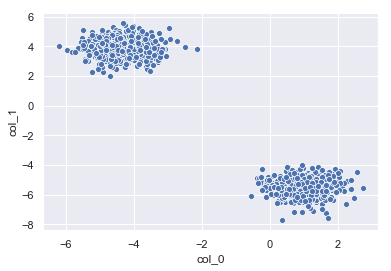

In [4]:
sns.scatterplot(x=X["col_0"],  y=X["col_1"]);

## Clustering Algorithms

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

<a id='kmc'></a>
### K-Means Clustering

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :

**1. Specify the desired number of clusters K:** Let us choose k=2 for these 5 data points in 2-D space.

<img src="imgs/kmc-1.png" alt="drawing" width="200">

**2. Randomly assign each data point to a cluster:** Let’s assign three points in cluster 1 shown using red color and two points in cluster 2 shown using grey color.

<img src="imgs/kmc-2.png" alt="drawing" width="200">

**3. Compute cluster centroids:** The centroid of data points in the red cluster is shown using red cross and those in grey cluster using grey cross.

<img src="imgs/kmc-3.png" alt="drawing" width="200">

**4. Re-assign each point to the closest cluster centroid:** Note that only the data point at the bottom is assigned to the red cluster even though its closer to the centroid of grey cluster. Thus, we assign that data point into grey cluster.

<img src="imgs/kmc-4.png" alt="drawing" width="200">

**5. Re-compute cluster centroids:** Now, re-computing the centroids for both the clusters.

<img src="imgs/kmc-5.png" alt="drawing" width="200">

**6. Repeat steps 4 and 5 until no improvements are possible:** Similarly, we’ll repeat the $4th$ and $5th$ steps until we’ll reach global optima. When there will be no further switching of data points between two clusters for two successive repeats. It will mark the termination of the algorithm if not explicitly mentioned.

#### How to perform K-Means Clustering using sklearn?

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=1234)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [6]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

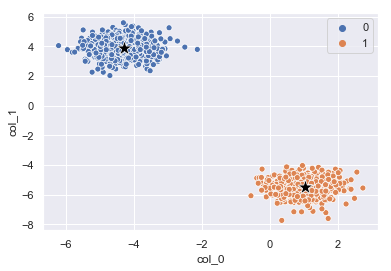

In [7]:
sns.scatterplot(x=X['col_0'], y=X['col_1'], hue=labels);

sns.scatterplot(centroids[:,0], centroids[:,1], marker='*', s=250, color='black');

<a id='gmm'></a>
### Gaussian Mixture Models (GMM)

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means.

Each Gaussian k in the mixture is comprised of the following parameters:

1. A mean $μ$ that defines its centre.
2. A covariance $Σ$ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
3. A mixing probability $π$ that defines how big or small the Gaussian function will be.

Let us now illustrate these parameters graphically:

<img src="imgs/gmm.png" alt="drawing" width="600">


Under the hood, a Gaussian mixture model is very similar to k-means: it uses an expectation–maximization approach which qualitatively does the following:

1. Choose starting guesses for the location and shape
2. Repeat until converged:
    * E-step: for each point, find weights encoding the probability of membership in each cluster
    * M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights
    
The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model. Just as in the k-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

#### How to perform GMM using sklearn?

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [9]:
labels = gmm.predict(X)

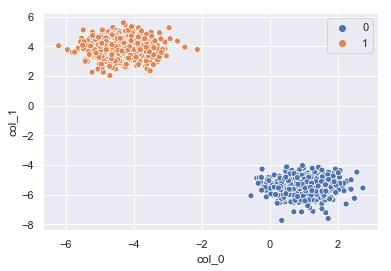

In [10]:
sns.scatterplot(x=X['col_0'], y=X['col_1'], hue=labels);

<a id='dbscan'></a>
### DBSCAN Clustering

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm.

**DBSCAN** groups together data points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks the points as outliers that are in low-density regions.

#### Parameters:
The DBSCAN algorithm basically requires 2 parameters:
* **eps:** specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
* **minPoints:** the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

#### How to choose the parameters?
* **eps:** if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

* **minPoints:** As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.

#### How to perform DBSCAN Clustering using sklearn?

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [12]:
labels = dbscan.labels_

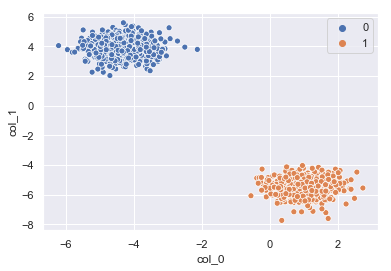

In [13]:
sns.scatterplot(x=X['col_0'], y=X['col_1'], hue=labels);

<a id='eval-cluster'></a>
## Evaluation Metrics for Clustering

Two ways you can evaluate your clustering performance:
1. When you **don't know** the **true labels**
2. When you **know** the **ture labels**

### When you don't know the true labels

**1. Silhouette Coefficient Score:** can be computed by **sklearn.metrics.silhouette_score**

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

**Advantages:**
* The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Note** that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.


**2. Calinski and Harabasz Score:**  can be computed by **sklearn.metrics.calinski_harabasz_score**

It is also known as the Variance Ratio Criterion. The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

**Advantages:**
* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
* The score is fast to compute.

**3. Davies-Bouldin Score:** can be computed by **sklearn.metrics.davies_bouldin_score**

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

**Advantages:**
* The computation of Davies-Bouldin is simpler than that of Silhouette scores.
* The index is computed only quantities and features inherent to the dataset.


### When you know the true labels

**1. Homogeneity Score:**  can be computed by **sklearn.metrics.homogeneity_score**

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

**Advantages:**
* Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.

**2. Mutual Information Score:**  can be computed by **sklearn.metrics.mutual_info_score**

Mutual Information between two clusterings. The Mutual Information is a measure of the similarity between two labels of the same data. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

**Advantages:**
* Upper bound of 1: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. 

#### Let's evaluate our previous models

In [14]:
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, homogeneity_score, mutual_info_score

# silhouette = silhouette_score(X, labels)
# calinski_harabasz = calinski_harabasz_score(X, labels)
# davies_bouldin = davies_bouldin_score(X, labels)

# homogeneity = homogeneity_score(labels_true, labels)
# mutual_info = mutual_info_score(labels_true, labels)

# print("""silhouette: {}
# calinski_harabasz: {}
# davies_bouldin: {}

# homogeneity: {}
# mutual_info: {}
# """.format(silhouette, calinski_harabasz, davies_bouldin, homogeneity, mutual_info))

## Dimensionality Reduction Algorithms

Dimensionality reduction is the process of reducing the number of features by obtaining a set of principal features to reduce the complexity of a model and avoid overfitting. It can be divided into feature selection and feature extraction. 

There are various methods used for dimensionality reduction:
* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Generalized Discriminant Analysis (GDA)

Dimensionality reduction may be both linear or non-linear, depending upon the method used. The prime linear method, called Principal Component Analysis, or PCA.

<a id='pca'></a>
### Principal component analysis (PCA)

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. Other popular applications of PCA include exploratory data analyses and de-noising of signals in stock market trading, and the analysis of genome data and gene expression levels in the field of bioinformatics.

PCA helps us to identify patterns in data based on the correlation between features. In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.

Before looking at the PCA algorithm for dimensionality reduction in more detail, let’s summarize the approach in a few simple steps:

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
6. Construct a projection matrix W from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

#### Let's practice in Python

#### Toy Dataset

In [15]:
from sklearn import datasets
import pandas as pd

def gen_classif_dataset(n_samples=1000, n_features=100, n_classes=2, random_state=123):
    """Generate dataset with 1000 samples, 100 features and 2 classes"""
    X, y = datasets.make_classification(
        n_features=n_features,
        n_samples=n_samples,
        n_informative=int(0.6 * n_features), # the number of informative features
        n_redundant=int(0.1 * n_features), # the number of redundant features
        n_classes=n_classes,
        random_state=random_state)
    
    X=pd.DataFrame(X).add_prefix('col_')
    y=pd.DataFrame(y, columns=['target'])
    
    return (X, y)

In [16]:
X, y = gen_classif_dataset(n_samples=1000, n_features=200, n_classes=2, random_state=123)

In [17]:
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
0,-7.174667,10.854239,5.353528,3.153130,-2.279397,4.069989,-0.455678,0.465086,5.984568,10.042431,...,-3.971672,3.189959,-1.137338,-4.906407,1.502443,-8.513257,13.108370,-0.624707,0.579444,-0.117696
1,-1.111850,-10.565125,10.873531,2.501206,-0.504573,3.948875,-0.239052,-1.016253,-0.235220,-2.991496,...,-3.990550,11.460699,-1.517576,-2.646349,-0.681197,-5.059042,65.011349,10.258659,-0.348492,0.070604
2,3.177979,-5.778262,-5.169115,0.470332,-1.906731,-1.151126,0.164581,2.465351,1.503098,10.752782,...,-7.264784,-3.262081,2.353379,9.434065,0.661926,7.188007,-36.097121,3.489829,-2.134182,-0.263484
3,-1.310468,3.923566,5.735798,-1.949465,-0.469067,4.200681,0.121271,2.320386,-6.431756,9.747112,...,-6.787017,1.839188,1.406462,-4.327146,0.284855,-1.105514,82.582270,3.698168,-1.971460,0.552686
4,-10.128611,-9.287290,4.978372,-9.075558,1.335365,4.821398,0.922612,9.382413,-9.675515,-2.403081,...,2.380740,-4.665379,0.965944,1.648258,0.441138,-10.041088,-34.697061,4.175457,0.254524,-0.494542


#### Standardize the data before applying PCA

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X.values)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca).add_prefix('pc_')

In [20]:
pca.explained_variance_ratio_

array([0.01933013, 0.01824787, 0.01676269, 0.0162595 , 0.01565151,
       0.01501121, 0.01484073, 0.01452776, 0.01369579, 0.01332473,
       0.01307028, 0.01269258, 0.01250679, 0.0122238 , 0.01171332,
       0.01166658, 0.01149985, 0.01116068, 0.0107823 , 0.01047462,
       0.0102975 , 0.01008333, 0.0098781 , 0.00972161, 0.00956983,
       0.00942067, 0.00933064, 0.00918778, 0.0089837 , 0.00881578,
       0.00860755, 0.00850652, 0.0082858 , 0.00825352, 0.00813832,
       0.0080513 , 0.00796248, 0.00776594, 0.00766236, 0.00756152,
       0.00743309, 0.0073271 , 0.00726473, 0.00713965, 0.00706038,
       0.00692088, 0.00688826, 0.00671722, 0.0065241 , 0.00647476])

In [21]:
pca = PCA(n_components=0.85)

X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca).add_prefix('pc_')

In [22]:
X_pca_df.shape

(1000, 115)

<a id='case3'></a>
# Case Study 3: Clustering

**Applications of Clustering Algorithm:**
* Market/Customer Segmentation
* Behavioural Segmentation
* Anomaly Detection
* Social Network Analysis

<h3 style=color:navy>Problem Description:</h3>

In this project, we will analyze a dataset containing data on various customers’ annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.



#### Let's find the customer segments!!

### Step 1: Data Collection

In [23]:
import pandas as pd

data_clst = pd.read_csv("clustering_wholesale_customers.csv")

### Step 2: Exploration (Exploratory Data Analysis)

Let's have a glance of the data.

In [24]:
data_clst.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


What about the data shape and datatypes?

In [25]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data_clst.shape[1], 
                                      data_clst.shape[0],
                                      len(data_clst.select_dtypes('O').columns),
                                      len(data_clst.select_dtypes(['int', 'float']).columns)))


No of columns: 6
No of rows: 435
No of categorical columns: 0
No of numerical columns: 6


Again, we don't have any categorical columns. That's easy!!

Let's have a descriptive statistical tables of the numeric columns.

In [26]:
data_clst.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,435.0,12089.372414,12662.796341,3.0,3208.0,8565.0,16934.5,112151.0
Milk,435.0,5788.103448,7374.172350,112.0,1579.5,3634.0,7168.0,73498.0
Grocery,435.0,7911.158621,9365.740973,218.0,2156.0,4757.0,10665.5,92780.0
Frozen,435.0,3096.126437,4873.769559,25.0,770.5,1541.0,3559.5,60869.0
Detergents_Paper,435.0,2848.473563,4679.364623,3.0,260.0,813.0,3935.0,40827.0
Delicatessen,435.0,1536.797701,2833.363881,3.0,411.5,967.0,1825.5,47943.0


How's the distribution of numerical columns?

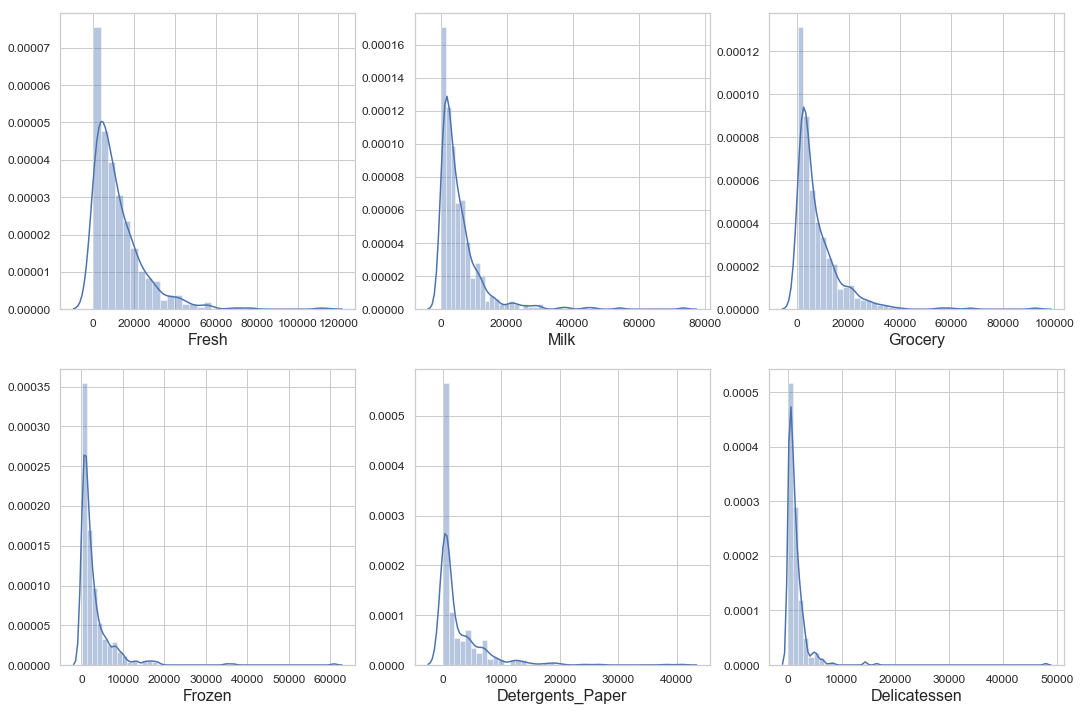

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,12))
    sns.set_style("whitegrid")

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data_clst, data_clst.columns)

Well distributed data!

Let's quickly check the correlations between the columns?

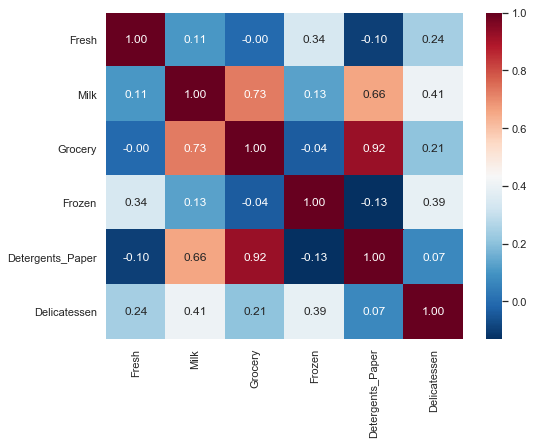

In [28]:
corr = data_clst.corr()
fig, ax = plt.subplots(figsize=(8,6))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="RdBu_r");

### Step 3: Preprocessing

Are there any **missing values**?

In [29]:
pd.DataFrame(data_clst.isnull().sum(), columns=['Missing Values'])

,Missing Values
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicatessen,0


DAMN!! We are very lucky!! No missing values!

Wait, this is a unsupervised clustering problem. So we don't need any **data segregation**.

Clustering algorithms **calculates distance from the centroids**. So, it is **highly affective to scaling**. Now, we need to perform scaling on the data.

In [30]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(data_clst)
data_clst_scaled = scaler.transform(data_clst.values)
data_clst_scaled = pd.DataFrame(data_clst_scaled, columns=data_clst.columns)

### Step 4: Modeling

Now, the modeling part!

In this section, we will use a **K-Means** clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

**Advantages of K-Means clustering**:
* Simple, easy to implement and interpret results.
* Good for hard cluster assignments i.e. when a data point only belongs to one cluster over the others.

Now, we ned to find the number of clusters using **elbow method**.

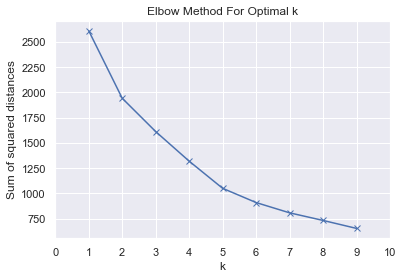

In [31]:
from sklearn.cluster import KMeans

def plot_elbow(data):
    sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k, random_state=1234)
        km = km.fit(data)
        sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(6,4))    
    sns.set(style="darkgrid")
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.xlim(0,10)
    plt.xticks(np.arange(0,11,1))
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show();

plot_elbow(data_clst_scaled)

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(data_clst_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Step 5: Validation (not actually; it may named as inference)

In [33]:
labels = km.labels_
centers = km.cluster_centers_

As this is unspervised learning, we can not calculate accuracy or prediction errors. However, we can determine the quality of clustring by calculating Silhouette Score.

**The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.**

In [34]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(data_clst, labels, metric='euclidean')

print(silhouette)

0.5025451717567272


In [35]:
true_centers = scaler.inverse_transform(centers)

segments = ['Segment {}'.format(i+1) for i in range(0,len(true_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data_clst.keys())
true_centers.index = segments

true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 1,12183.0,3987.0,5381.0,2935.0,1659.0,1256.0
Segment 2,11403.0,19054.0,26548.0,4282.0,11612.0,3606.0


**Now, let's make inference from the segments**:

* **Segment 1**: This segment best represents retailers. Their spend on Fresh is the highest. Their spend on other categories are lower but close to mean and median.

* **Segment 2**: This segment best represents supermarkets. They spend the higher than mean and median amount on Milk, Grocery, Frozen, Detergents_Paper and Delicassen, which are both essential to be stocked in such places.

In [36]:
data_clst.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,435.0,12089.372414,12662.796341,3.0,3208.0,8565.0,16934.5,112151.0
Milk,435.0,5788.103448,7374.172350,112.0,1579.5,3634.0,7168.0,73498.0
Grocery,435.0,7911.158621,9365.740973,218.0,2156.0,4757.0,10665.5,92780.0
Frozen,435.0,3096.126437,4873.769559,25.0,770.5,1541.0,3559.5,60869.0
Detergents_Paper,435.0,2848.473563,4679.364623,3.0,260.0,813.0,3935.0,40827.0
Delicatessen,435.0,1536.797701,2833.363881,3.0,411.5,967.0,1825.5,47943.0


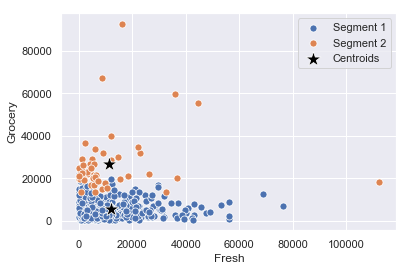

In [39]:
sns.scatterplot(x=data_clst[labels==0]['Fresh'].values, y=data_clst[labels==0]['Grocery'].values, s=50, label='Segment 1');
sns.scatterplot(x=data_clst[labels==1]['Fresh'].values, y=data_clst[labels==1]['Grocery'].values, s=50, label='Segment 2');

sns.scatterplot(true_centers['Fresh'], true_centers['Grocery'], marker='*', s=250, color='black', label='Centroids');

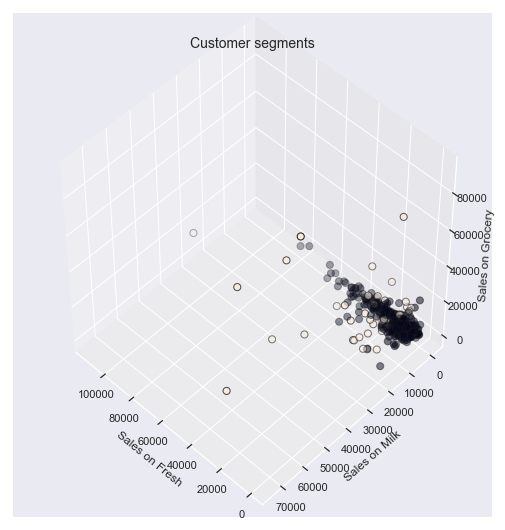

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data_clst['Fresh'], 
           data_clst['Milk'], 
           data_clst['Grocery'],
           c=labels.astype(np.float), 
           edgecolor="k", s=50)

ax.set_xlabel("Sales on Fresh")
ax.set_ylabel("Sales on Milk")
ax.set_zlabel("Sales on Grocery")
plt.title("Customer segments", fontsize=14)
plt.show();